In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import get_window
from smstools.models import utilFunctions as UF
from smstools.models import sineModel as SM
from smstools.models import harmonicModel as HM

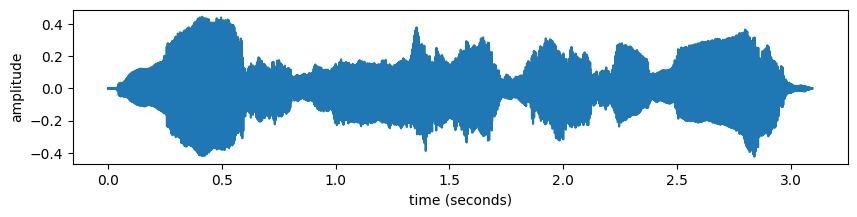

In [2]:
inputFile = '../sounds/vignesh.wav'
fs, x = UF.wavread(inputFile)
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, x.size/fs, x.size)
plt.plot(time_indexes, x)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x, rate=fs))

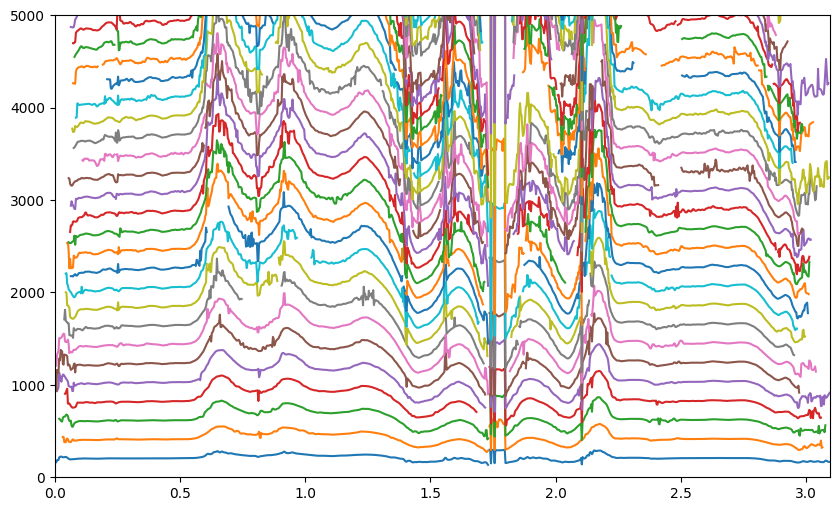

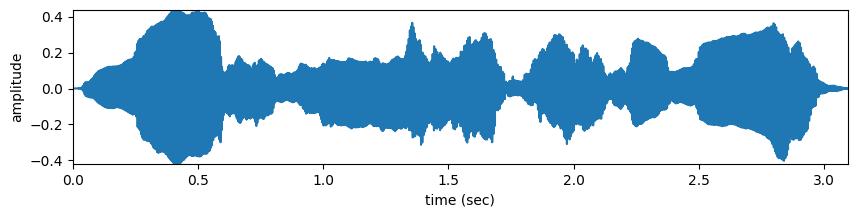

In [3]:
window="blackman"
M=1201
N=2048
t=-90
minSineDur=0.1
nH=100
minf0=130
maxf0=300
f0et=7
harmDevSlope=0.01

 # size of fft used in synthesis
Ns = 512
# hop size (has to be 1/4 of Ns)
H = 128

w = get_window(window, M)
hfreq, hmag, hphase = HM.harmonicModelAnal(x, fs, w, N, H, t, nH, minf0, maxf0, f0et, harmDevSlope, minSineDur)
y = SM.sineModelSynth(hfreq, hmag, hphase, Ns, H, fs)

plt.figure(figsize=(10, 6))
maxplotfreq = 5000.0
numFrames = hfreq.shape[0]
frmTime = H * np.arange(numFrames) / float(fs)
hfreq[hfreq <= 0] = np.nan
plt.plot(frmTime, hfreq)
plt.axis([0, x.size / float(fs), 0, maxplotfreq])
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(np.arange(y.size) / float(fs), y)
plt.axis([0, y.size / float(fs), min(y), max(y)])
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.show()
ipd.display(ipd.Audio(data=y, rate=fs))